In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir /content/dataset
%cd /content/dataset
!curl -L "https://app.roboflow.com/ds/Vvdlzln5cF?key=EFpSKodPPY" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

%cd /content/
!git clone https://github.com/ultralytics/yolov5.git

%cd /content/yolov5/
!pip install -r requirements.txt

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: train/labels/H_8507-60-1000_06_197_png.rf.52c4a5d23bca8a712cd82ae3dcbd33d3.txt  
 extracting: train/labels/H_8507-60-1000_06_197_png.rf.8d2f5939fadca3d370272d5939afd804.txt  
 extracting: train/labels/H_8507-60-1000_06_197_png.rf.e9c61e0525054fbf2fbe7c474496cc0f.txt  
 extracting: train/labels/H_8507-60-1000_06_198_png.rf.402867e31b6526999c181fccf9d7153a.txt  
 extracting: train/labels/H_8507-60-1000_06_198_png.rf.58f7da707156d70284b35e92b0ac86d6.txt  
 extracting: train/labels/H_8507-60-1000_06_198_png.rf.99f91f7f76f804e4c1e1aedf00f1b81d.txt  
 extracting: train/labels/H_8507-60-1000_06_199_png.rf.987834f97f99873e28db584651cc83bc.txt  
 extracting: train/labels/H_8507-60-1000_06_199_png.rf.acbec12ac4f2f0366d525b008d98e0e8.txt  
 extracting: train/labels/H_8507-60-1000_06_199_png.rf.ed31cf4d78dfa599604da2ff5506c8b3.txt  
 extracting: train/labels/H_8507-60-1000_06_200_png.rf.50857d640f795822523819e52cdb0497.txt  
 extracting: train/label

In [3]:
!cp /content/drive/MyDrive/programming/results/YOLO_V5/runs/train/total_yolov5l_50results/weights/best.pt /content/yolov5/50.pt
!cp /content/drive/MyDrive/programming/results/YOLO_V5/runs/train/total_yolov5l_60results/weights/best.pt /content/yolov5/60.pt

In [4]:
from glob import glob
from sklearn.model_selection import train_test_split

img_list = glob('/content/dataset/train/images/*.jpg')
print(len(img_list))

train_img_list, val_img_list = train_test_split(img_list, test_size=0.2, random_state=2021)
print(len(train_img_list), len(val_img_list))

26724
21379 5345


detect: weights=['/content/yolov5/50.pt'], source=/content/dataset/train/images/H_8202-39-2090_03_635_png.rf.85392941aa968d48ff417007d8b0a0ce.jpg, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-124-g1075488 torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 367 layers, 46183668 parameters, 0 gradients, 108.0 GFLOPs
image 1/1 /content/dataset/train/images/H_8202-39-2090_03_635_png.rf.85392941aa968d48ff417007d8b0a0ce.jpg: 416x416 2 Saws, 1 SmartPhone, 1 SupplymentaryBattery, Done. (0.943s)
Speed: 1.8ms pre-process, 943.1ms inference, 1.1ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp
2 labels saved to runs/detect/exp/labels


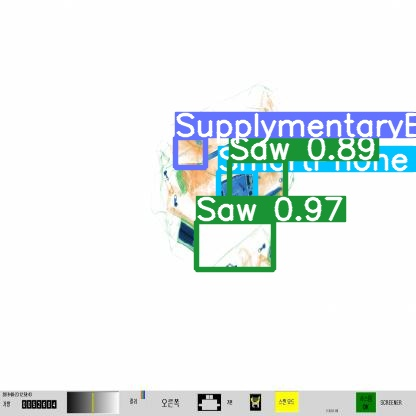

In [8]:
from IPython.display import Image
import os

val_img_path = val_img_list[1]

!python detect.py --weights /content/yolov5/50.pt --save-txt --save-conf --exist-ok --img 416 --conf 0.5 --source '{val_img_path}'

Image(os.path.join('/content/yolov5/runs/detect/exp', os.path.basename(val_img_path)))

detect: weights=['/content/yolov5/60.pt'], source=/content/dataset/train/images/H_8202-39-2090_03_635_png.rf.85392941aa968d48ff417007d8b0a0ce.jpg, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-124-g1075488 torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 367 layers, 46183668 parameters, 0 gradients, 108.0 GFLOPs
image 1/1 /content/dataset/train/images/H_8202-39-2090_03_635_png.rf.85392941aa968d48ff417007d8b0a0ce.jpg: 416x416 2 Saws, 1 SmartPhone, 1 SupplymentaryBattery, Done. (0.945s)
Speed: 1.8ms pre-process, 944.6ms inference, 1.1ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp
2 labels saved to runs/detect/exp/labels


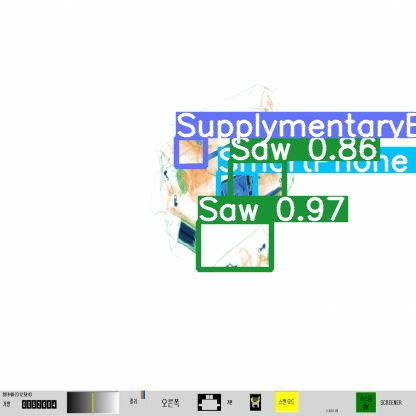

In [9]:
val_img_path = val_img_list[1]

!python detect.py --weights /content/yolov5/60.pt --save-txt --save-conf --exist-ok --img 416 --conf 0.5 --source '{val_img_path}'

Image(os.path.join('/content/yolov5/runs/detect/exp', os.path.basename(val_img_path)))